<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

**1. Загрузить датасет**

In [2]:
import io
import requests
data=pd.read_csv("creditcard.csv") 
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
print (data.count())

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64


In [4]:
print(data.tail())

            Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  

**Колонок с Nan элементами нет**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

**Или так**

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

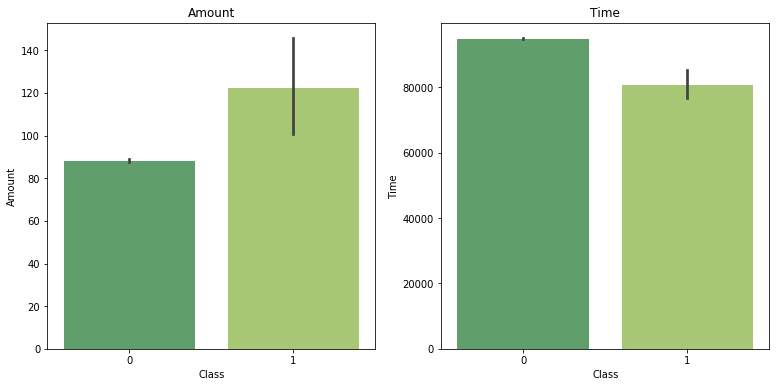

In [6]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
sns.barplot(x = 'Class', y = 'Amount',data = data, palette='summer')
plt.title('Amount')
plt.subplot(1, 3, 2)
sns.barplot(x = 'Class', y = 'Time',data = data, palette='summer')
plt.title('Time')
plt.show()

[284315, 492]


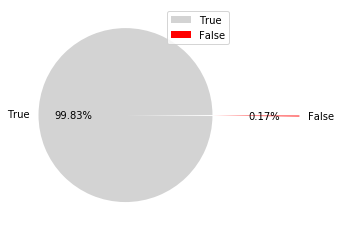

In [7]:
size = list(data['Class'].value_counts())
print(size)
colors = ['lightgray', 'red']
labels = "True", "False"
explode = [0, 1]
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = False)
plt.legend()
plt.show()

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

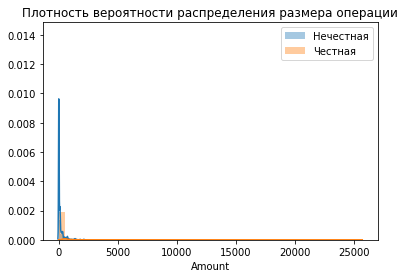

In [8]:
false = data[data['Class']==1]['Amount']
true = data[data['Class']==0]['Amount']
sns.distplot(false)
sns.distplot(true)
plt.title('Плотность вероятности распределения размера операции')
plt.legend(['Нечестная', 'Честная'])
plt.show()

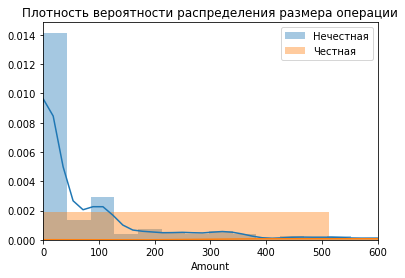

In [9]:
false = data[data['Class']==1]['Amount']
true = data[data['Class']==0]['Amount']
plt.xlim (-1, 600)
sns.distplot(false)
sns.distplot(true)
plt.title('Плотность вероятности распределения размера операции')
plt.legend(['Нечестная', 'Честная'])
plt.show()

**5. Построить графики histograms для всех значений**

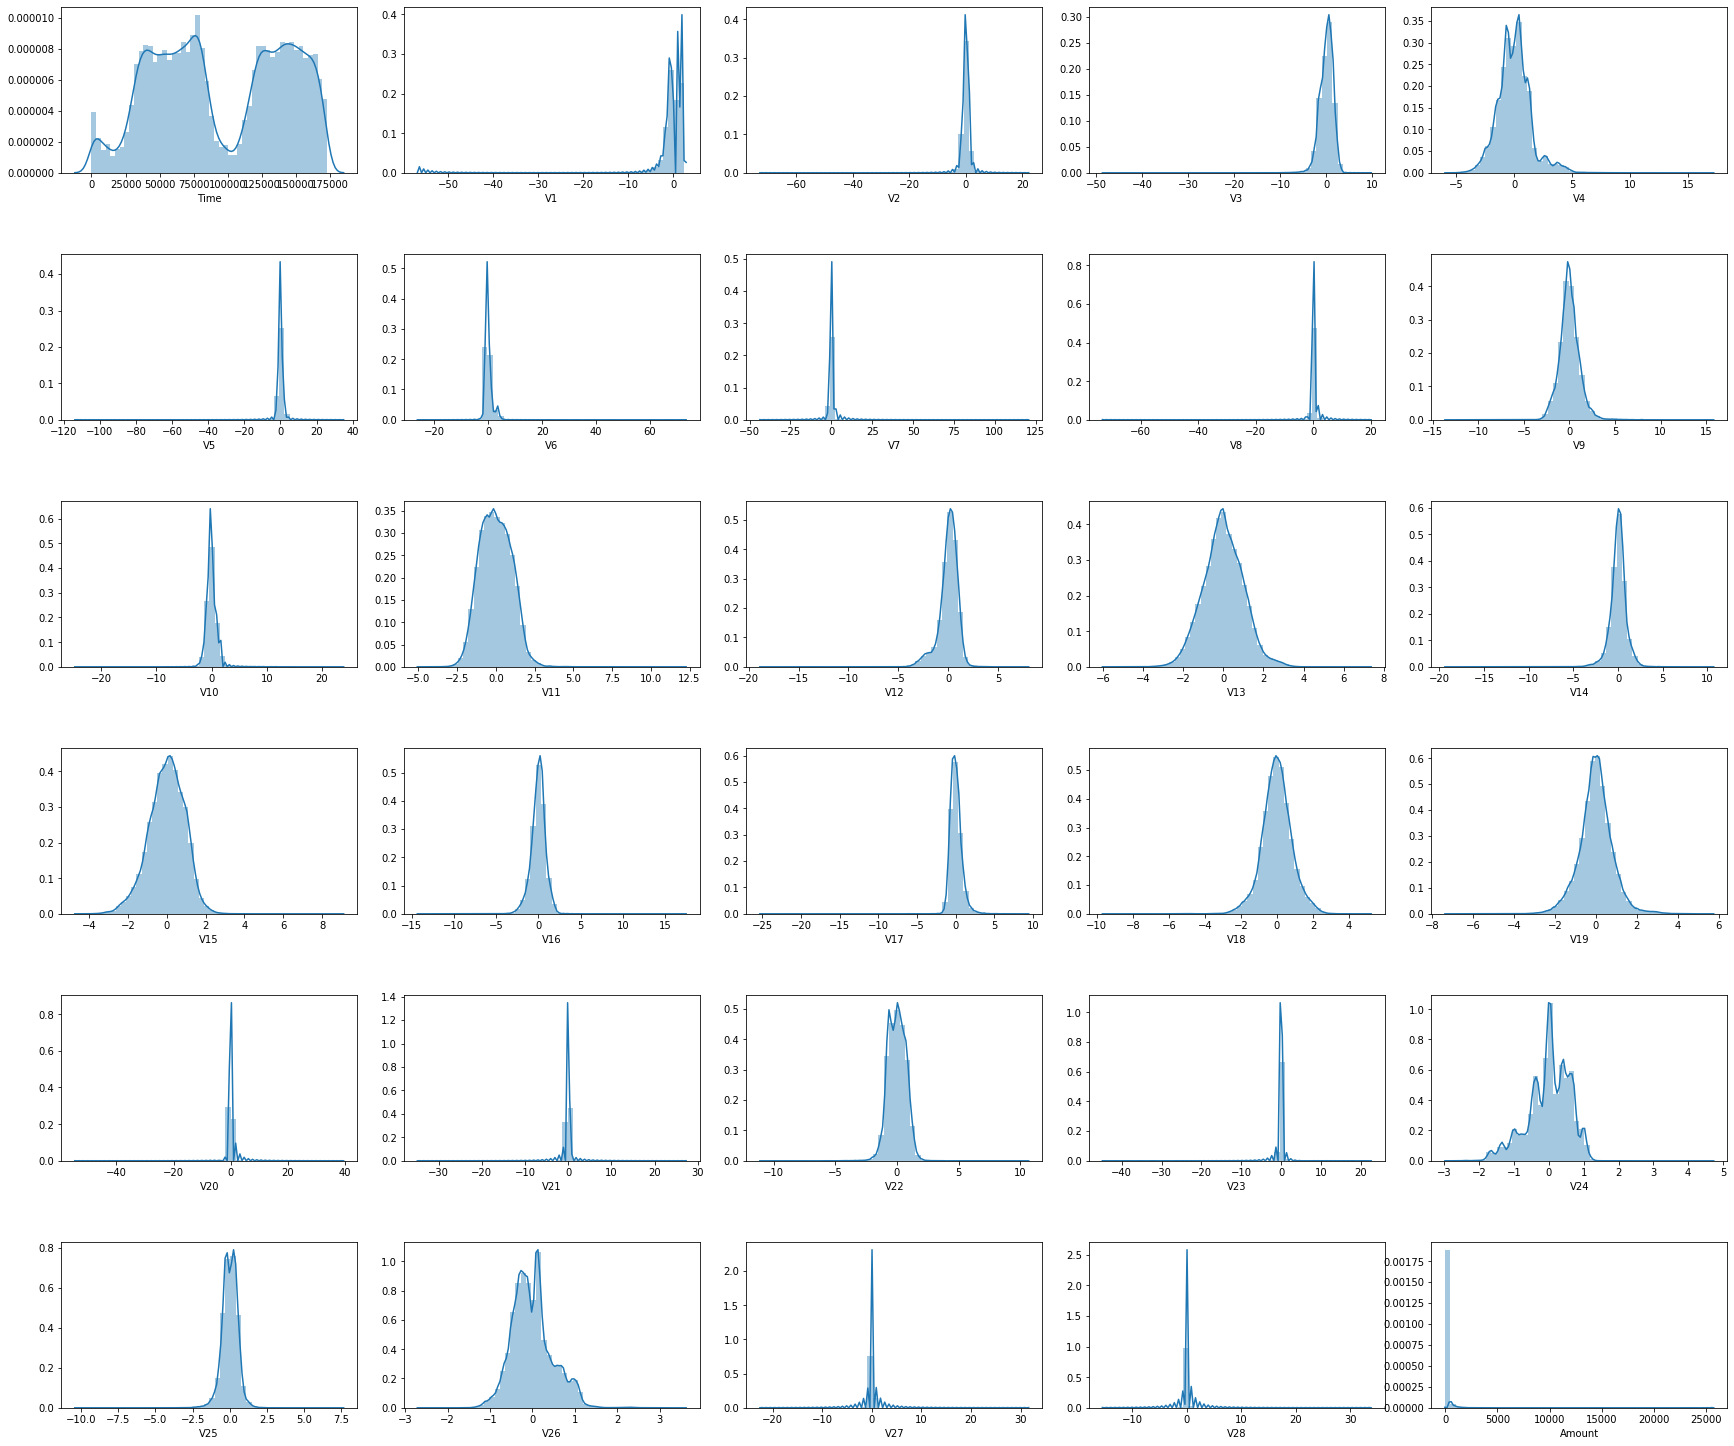

In [10]:
fig, axs = plt.subplots(ncols=5, nrows=6, figsize=(24, 20))
index = 0
axs = axs.flatten()
for k,v in data.items():
    if index != 30:
        sns.distplot(v, ax=axs[index])
        index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

**6. Построить матрицу корреляций для всех значений**

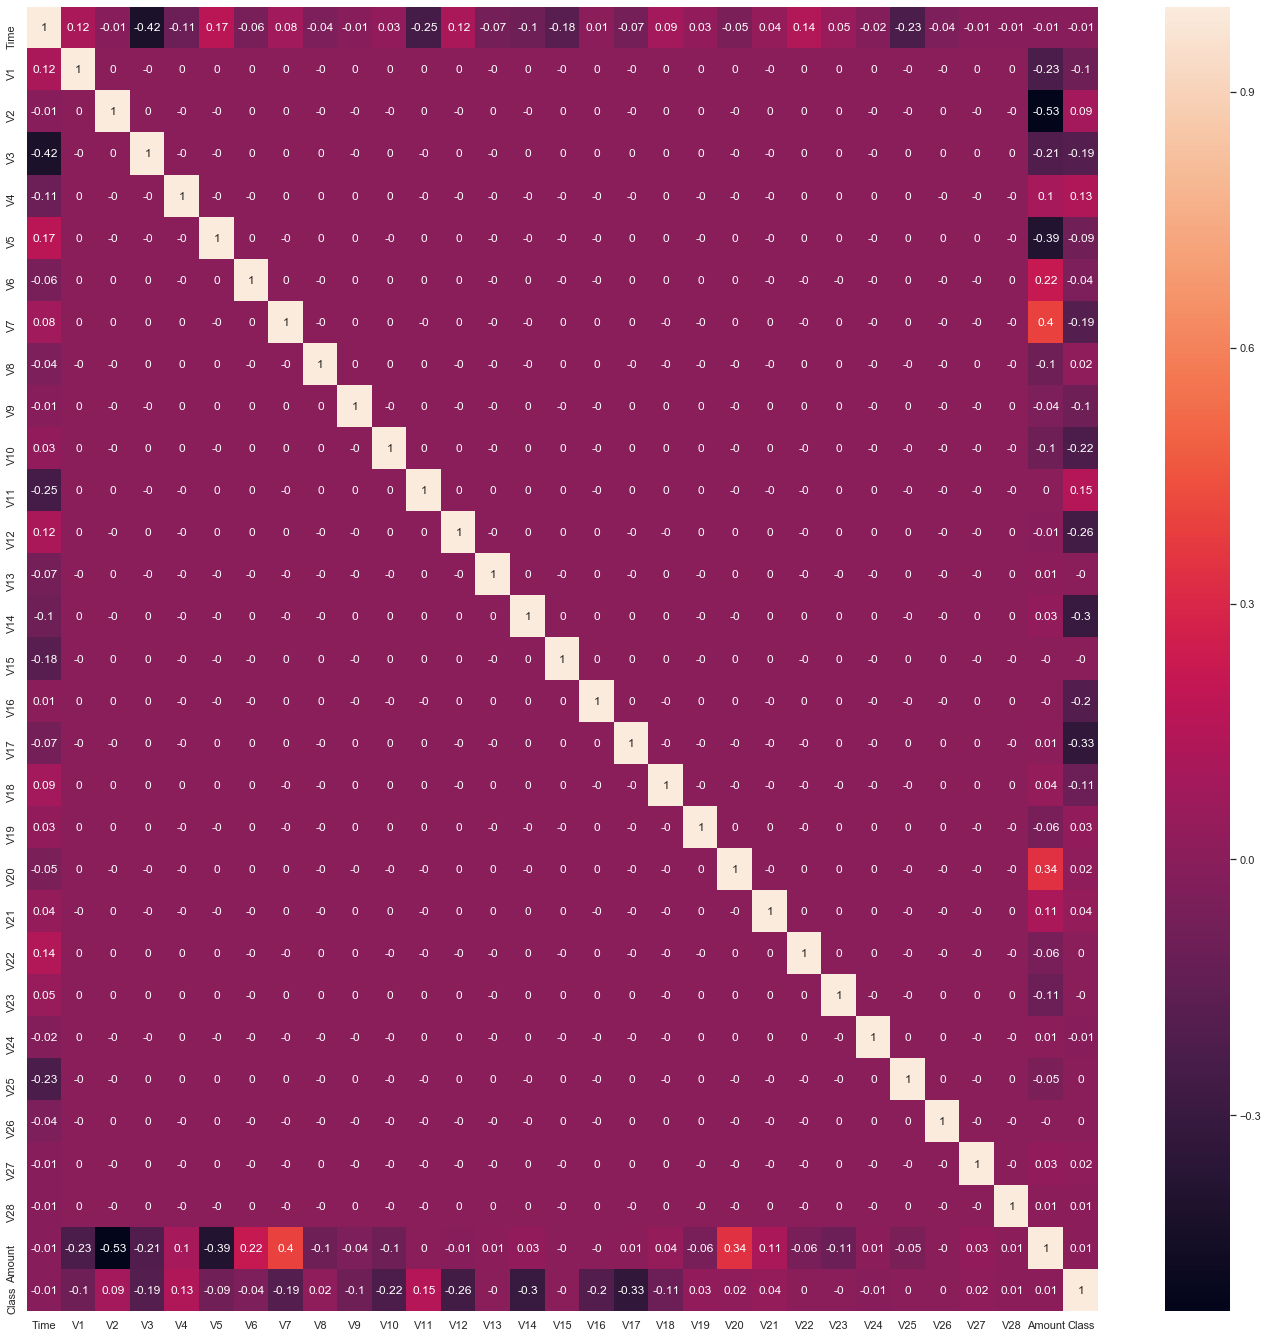

In [11]:
sns.set(rc={'figure.figsize':(24,24)})
correlation_matrix = data.corr(method ='pearson').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

**7. Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель логистической регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию  из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

**Все данные слабо статистически связаны с классом транзакции. Можно выделить V3, V4, V7, V10, V11, V12, V14, V16, V17**

In [17]:
y = data.Class
X = data.drop(['Class','Time','Amount','V1','V2','V5','V6','V8','V9','V13','V15','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'], axis=1)
X.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033


In [19]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [27]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.92      0.61      0.73       132

    accuracy                           1.00     71202
   macro avg       0.96      0.80      0.87     71202
weighted avg       1.00      1.00      1.00     71202



**Можно погордиться собой, результаты получились лучше, чем на лекции.  
92% точности против 89% лекционных и 61% полноты против 59% лекционных  
Причина понятна, убрали "шум" из слабокррелирующих данных**

**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать логистической регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [39]:
data_false = data[data['Class'] == 1]
data_true = data[data['Class'] == 0]
data_true_min = data_true.sample(n=492)
data_true_min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 250490 to 56398
Data columns (total 31 columns):
Time      492 non-null float64
V1        492 non-null float64
V2        492 non-null float64
V3        492 non-null float64
V4        492 non-null float64
V5        492 non-null float64
V6        492 non-null float64
V7        492 non-null float64
V8        492 non-null float64
V9        492 non-null float64
V10       492 non-null float64
V11       492 non-null float64
V12       492 non-null float64
V13       492 non-null float64
V14       492 non-null float64
V15       492 non-null float64
V16       492 non-null float64
V17       492 non-null float64
V18       492 non-null float64
V19       492 non-null float64
V20       492 non-null float64
V21       492 non-null float64
V22       492 non-null float64
V23       492 non-null float64
V24       492 non-null float64
V25       492 non-null float64
V26       492 non-null float64
V27       492 non-null float64
V28       492 non-nu

In [40]:
data_min = data_false.append(data_true_min, ignore_index = True)
data_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 31 columns):
Time      984 non-null float64
V1        984 non-null float64
V2        984 non-null float64
V3        984 non-null float64
V4        984 non-null float64
V5        984 non-null float64
V6        984 non-null float64
V7        984 non-null float64
V8        984 non-null float64
V9        984 non-null float64
V10       984 non-null float64
V11       984 non-null float64
V12       984 non-null float64
V13       984 non-null float64
V14       984 non-null float64
V15       984 non-null float64
V16       984 non-null float64
V17       984 non-null float64
V18       984 non-null float64
V19       984 non-null float64
V20       984 non-null float64
V21       984 non-null float64
V22       984 non-null float64
V23       984 non-null float64
V24       984 non-null float64
V25       984 non-null float64
V26       984 non-null float64
V27       984 non-null float64
V28       984 non-null floa

In [46]:
y_min = data_min.Class
X_min = data_min.drop(['Class','Time','Amount','V1','V2','V5','V6','V8','V9','V13','V15','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'], axis=1)
X_min.tail()

,V3,V4,V7,V10,V11,V12,V14,V16,V17
979,-3.164921,0.392190,-0.129606,-0.249182,0.242526,0.129325,-0.577646,0.033537,0.491119
980,-2.225256,-0.535939,1.208329,-2.120813,-0.586441,-0.481466,-2.314720,0.804893,1.913706
981,1.940508,3.018418,0.877533,0.859098,-1.223354,-0.178869,-0.800253,-0.189641,-0.131084
982,-2.354049,1.896678,-1.261613,-1.231600,0.856959,0.550818,-0.998176,0.348845,2.011078
983,-0.247967,-0.190213,-0.617924,0.192980,1.239295,0.852802,0.597202,0.604888,0.543310


In [48]:
X_min_train, X_min_test, y_min_train, y_min_test = train_test_split(X_min, y_min, test_size=0.25, random_state=27)
model = LogisticRegression(solver='liblinear').fit(X_min_train, y_min_train)
model_pred = model.predict(X_min_test)
print(classification_report(y_min_test, model_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       118
           1       0.98      0.91      0.94       128

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.95      0.94      0.94       246



**Результаты меньшей выборки лучше, мне непонятно почему**

In [50]:
model_pred = model.predict(X)
print(classification_report(y, model_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.06      0.91      0.12       492

    accuracy                           0.98    284807
   macro avg       0.53      0.94      0.55    284807
weighted avg       1.00      0.98      0.99    284807



**Если применить данную модель для всего датасета, получим низкую точность, но высокий прогноз по отгадыванию  
здесь как раз мне понятно почему (я надеюсь). Просто мы проверяем свои данные как раз на тех же данных, что и обкатывали (по нечестным транзациям),  
т.е. отгадываем, то на чем строили свою модель**

**9. Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [61]:
model = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train)
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.93      0.66      0.77       132

    accuracy                           1.00     71202
   macro avg       0.96      0.83      0.88     71202
weighted avg       1.00      1.00      1.00     71202



**Здесь мы получаем наилучшие результаты**